# titulo

temas:

- visualizacion
- Olex_automatic_eda


In [1]:
import pandas as pd
import numpy as np
import pickle
import model_evaluation as me
from transformers import pipeline
import matplotlib.pyplot as plt

In [2]:
# 1 ## Loading data
with open("./metrics/results.pkl", "rb") as f:
    results = pickle.load(f)

emotions = results["dataset"]
preds_output = results["predictions"]

df = pd.read_csv('./metrics/results.csv')


In [3]:
# 2 ##  Computing metrics
y_preds = np.argmax(preds_output.predictions, axis=1)
y_valid = np.array(emotions["validation"]["label"])
labels = emotions["validation"].features["label"].names

In [4]:
preds_output.metrics

{'test_loss': 0.3595648407936096,
 'test_accuracy': 0.8895,
 'test_f1': 0.8900286564226987,
 'test_runtime': 130.6009,
 'test_samples_per_second': 15.314,
 'test_steps_per_second': 0.245}

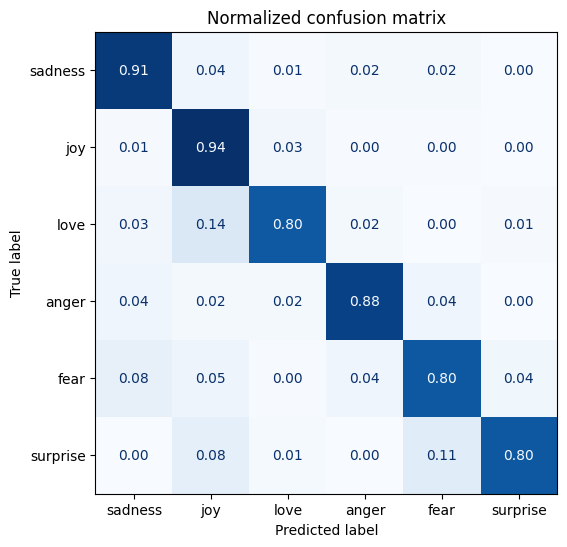

In [5]:
me.plot_confusion_matrix(y_valid, y_preds, labels)

# Error Analysis

- Sort the validation samples by the model loss.
- Looking at the samples with the lowest losses,

In [6]:
list(df.sort_values("loss", ascending=False)['text'].head(10))

['im over having this feeling of doubt because i know that when he goes to his friends house there are a bunch of slutty chicks there',
 'i had applied for a job and they had assured me that the exams would take place a few months later a week later i went to obtain some more information and they told me that the exams had already taken place',
 'i was and championed me to feel and be fearless',
 'i from behind she could practically feel his outraging distress which amused her slightly',
 'i feel badly about reneging on my commitment to bring donuts to the faithful at holy family catholic church in columbus ohio',
 'i got outside i beat myself up pretty bad mentally of course for not going with my gut feeling but again i was hesitant b c ive never done this before and that was actually my very st time meeting with a seller and feeling good about a particular property',
 'i feel food smarter already and slightly annoyed calories counting is so annoying',
 'i wonder what the other studen

In [7]:
print('real label: ', list(df.sort_values("loss", ascending=False)['label'].head(10)))
print('predicted label', list(df.sort_values("loss", ascending=False)['predicted_label'].head(10)))

real label:  ['love', 'anger', 'joy', 'joy', 'love', 'fear', 'anger', 'joy', 'joy', 'anger']
predicted label ['fear', 'joy', 'fear', 'anger', 'sadness', 'joy', 'joy', 'fear', 'fear', 'sadness']


Podriamos contemplar el hecho que algunas entradas esten mal etiquetadas

In [8]:
df.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
683,i am doing this namely for myself but i feel t...,joy,joy,0.030154
489,i was feeling pretty good about the day ahead ...,joy,joy,0.031598
620,i shall move right along to the post interview...,joy,joy,0.031896
797,im feeling playful i thought i would share my ...,joy,joy,0.031896
205,i cannot wait for school to end so i can chang...,joy,joy,0.031928
615,i feel have shown me that timing is veery impo...,joy,joy,0.031995
1160,i was feeling playful so i made a little snowm...,joy,joy,0.032031
804,i feel are most valuable i think he discounts ...,joy,joy,0.032091
821,i am giving my pt takes the time to work with ...,joy,joy,0.032135
1884,i don t exactly feel sociable still,joy,joy,0.032599


Podemos observar que nuestro modelo se siente más cómodo prediciendo la etiqueta "joy".

# Testing del modelo

In [9]:
model_id = "agustinst1990/distilbert-base-multilingual-cased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

c:\Users\Agustin\Proyectos 2023\Septiembre\11-NLP_pre-trained_models_test-drive\vnv_cuda\lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


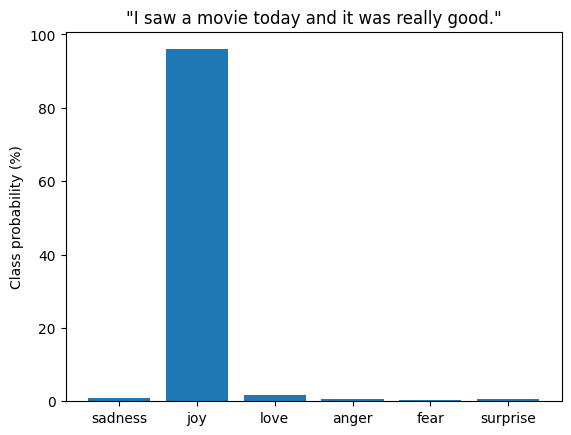

In [10]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)

preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

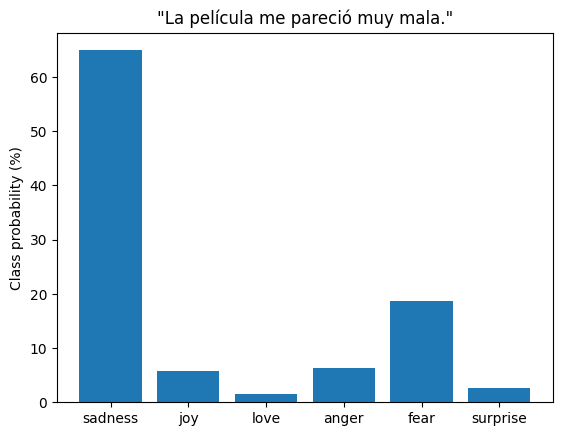

In [11]:
custom_tweet = "La película me pareció muy mala."
preds = classifier(custom_tweet, return_all_scores=True)

preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()